# Cybersecurity: Advanced AI-Powered

> AI is significantly enhancing cybersecurity by enabling advanced threat detection, incident response, and proactive defense strategies. AI-powered systems can analyze vast amounts of data to identify anomalies, predict vulnerabilities, and automate security tasks, making it more efficient and effective at protecting systems. 

**Here's a more detailed look at how AI is being used in cybersecurity:**

- Threat Detection:
- Real-time monitoring:
AI can analyze network traffic and system behavior in real-time, identifying suspicious patterns and anomalies that might indicate a cyberattack. 
- Vulnerability identification:
AI models can analyze data to detect security weaknesses, predict potential threats, and recommend remediation strategies. 
- Predictive threat intelligence:
AI can analyze historical data to predict potential threats and vulnerabilities, allowing organizations to take proactive measures. 
- Incident Response:
- Automated triage and prioritization:
AI can automatically categorize and prioritize security alerts, helping security teams focus on the most critical threats. 
- Rapid threat containment:
AI-powered solutions can automatically isolate infected endpoints or terminate malicious processes, preventing the spread of an attack. 
- Context-aware alerts:
AI can provide context-aware alerts, enriching alerts with information that helps security teams understand the nature of the threat and respond more effectively.    ---- Proactive Defense:
- User behavior analytics (UBA):
AI can analyze user behavior to detect insider threats and compromised accounts. 
- Data loss prevention (DLP):
AI can monitor and protect sensitive data from unauthorized access and breaches. 
- Security automation:
AI can automate security tasks, such as vulnerability scanning, patch management, and security configuration, freeing up security teams to focus on more strategic activities. 
- Examples of AI-powered cybersecurity solutions:
- Palo Alto Networks Cortex XDR:
A holistic XDR solution that uses AI to detect, investigate, and respond to threats across networks, endpoints, and cloud environments. 
- Vectra AI:
A platform that focuses on detecting known and unknown threats across various environments using behavior-based analysis and threat intelligence. 
- CrowdStrike Falcon:
An EDR solution that monitors endpoint activity, analyzes behavior baselines, and alerts security teams in real-time. 
- Benefits of AI in Cybersecurity:
- Improved threat detection:
AI can identify threats more quickly and accurately than traditional methods. 
- Faster incident response:
AI can automate incident response, reducing the time it takes to contain a breach. 
- Proactive defense:
AI can help organizations identify and mitigate vulnerabilities before they are exploited. 
- Reduced alert fatigue:
AI can help filter out irrelevant alerts, focusing security teams on the most important threats. 
- Increased efficiency:
AI can automate security tasks, freeing up security teams to focus on more strategic activities. 

# Project Overview

> This project leverages advanced machine learning techniques to classify web traffic anomalies and provide automated response strategies. By analyzing VPC flow data, we aim to enhance cybersecurity measures for cloud-based systems.

# Introduction

This project focuses on:

- Detecting web traffic anomalies.
- Classifying attack types (e.g., DDoS, SQL Injection).
- Proposing intelligent response strategies.

# Project Objectives

- Threat Detection: Identify suspicious patterns in web traffic.
- Attack Classification: Categorize traffic anomalies into specific attack types.
- Response Recommendation: Suggest automated defense strategies for identified threats.

 # Importing Required Libraries

In [5]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt  
import seaborn as sns            
import plotly.express as px      
import plotly.graph_objects as go   

from sklearn.model_selection import train_test_split  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder   
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix   
from datetime import datetime  # Timestamp handling
import warnings
warnings.filterwarnings('ignore')   
try:
    import ipywidgets as widgets  # Interactive widgets for Jupyter notebooks
except ImportError:
  print("Optional library 'ipywidgets' not installed. Install via 'pip install ipywidgets' if required.")
print("Libraries successfully imported. Ready to proceed!")

Libraries successfully imported. Ready to proceed!


# Importing and Exploring the Dataset

In [11]:
file_path = '/kaggle/input/ai-cyber-threat-detector/cleaned_featured_data.csv'

In [14]:
try:
    df = pd.read_csv(file_path)
    print("✔️ Dataset successfully loaded!")
except FileNotFoundError:
    print(f"❌ File not found at {file_path}. Please check the file path and try again.")

✔️ Dataset successfully loaded!


In [17]:
print(f'✔️The shape of the data is: {df.shape}\n')
print(f'✔️The size of the data is: {df.size}\n')


✔️The shape of the data is: (282, 16)

✔️The size of the data is: 4512



In [18]:
print(f'✔️The shape of the data is: {df.info}\n')
print(f'✔️The columns in the dataset are: \n {df.columns}')

✔️The shape of the data is: <bound method DataFrame.info of                  creation_time                   end_time           src_ip  \
0    2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   147.161.161.82   
1    2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00     165.225.33.6   
2    2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00  165.225.212.255   
3    2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   136.226.64.114   
4    2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   165.225.240.79   
..                         ...                        ...              ...   
277  2024-04-26 09:50:00+00:00  2024-04-26 10:00:00+00:00   136.226.77.103   
278  2024-04-26 09:50:00+00:00  2024-04-26 10:00:00+00:00   165.225.26.101   
279  2024-04-26 09:50:00+00:00  2024-04-26 10:00:00+00:00    155.91.45.242   
280  2024-04-26 09:50:00+00:00  2024-04-26 10:00:00+00:00    165.225.209.4   
281  2024-04-26 09:50:00+00:00  2024-04-26 10:00:00+00:00    147.161.131.1   

   

In [19]:
if df.duplicated().any()>0:
    print(f"✔️The number of duplicates are {df.duplicated().sum()}")
else:
    print(f'✔️There are no duplicates r in the dataset')

✔️There are no duplicates r in the dataset


In [20]:
print("\n☑️ First 5 Rows:")
print(data.head())


☑️ First 5 Rows:
               creation_time                   end_time           src_ip  \
0  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   147.161.161.82   
1  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00     165.225.33.6   
2  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00  165.225.212.255   
3  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   136.226.64.114   
4  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   165.225.240.79   

  src_ip_country_code protocol        dst_ip              rule_names  \
0                  AE    HTTPS  10.138.69.97  Suspicious Web Traffic   
1                  US    HTTPS  10.138.69.97  Suspicious Web Traffic   
2                  CA    HTTPS  10.138.69.97  Suspicious Web Traffic   
3                  US    HTTPS  10.138.69.97  Suspicious Web Traffic   
4                  NL    HTTPS  10.138.69.97  Suspicious Web Traffic   

                       observation_name   source.meta     source.name  \
0  Adversary Infras

In [21]:
print("\n🛡️ Dataset Statistics:")
print(data.describe(include='all'))


🛡️ Dataset Statistics:
                    creation_time                   end_time         src_ip  \
count                         282                        282            282   
unique                         30                         30             28   
top     2024-04-26 09:00:00+00:00  2024-04-26 09:10:00+00:00  165.225.209.4   
freq                           17                         17             29   
mean                          NaN                        NaN            NaN   
std                           NaN                        NaN            NaN   
min                           NaN                        NaN            NaN   
25%                           NaN                        NaN            NaN   
50%                           NaN                        NaN            NaN   
75%                           NaN                        NaN            NaN   
max                           NaN                        NaN            NaN   

       src_ip_country_code 

# Missing Data Check and Homogeneity Testing

In [22]:
missing_data = data.isnull().sum()
print("\n✔️Missing Data Summary:")
print(missing_data[missing_data > 0])


✔️Missing Data Summary:
Series([], dtype: int64)


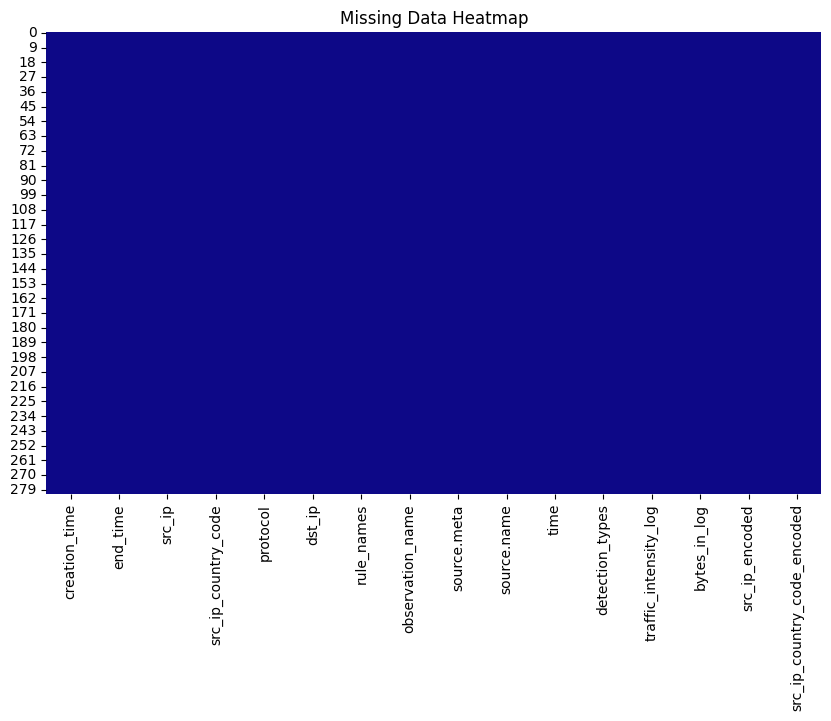

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Data Heatmap')
plt.show()

In [30]:
# Importing necessary libraries for statistical tests
from scipy.stats import levene

In [31]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [33]:
print("\n✔️ Missing data handling and homogeneity testing completed!")


✔️ Missing data handling and homogeneity testing completed!


# Normalizing and Scaling Features

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [47]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [48]:
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [50]:
print("\n✅ Transformed Dataset (First 5 Rows):")
print(data.head())


✅ Transformed Dataset (First 5 Rows):
               creation_time                   end_time           src_ip  \
0  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   147.161.161.82   
1  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00     165.225.33.6   
2  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00  165.225.212.255   
3  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   136.226.64.114   
4  2024-04-25 23:00:00+00:00  2024-04-25 23:10:00+00:00   165.225.240.79   

  src_ip_country_code protocol        dst_ip              rule_names  \
0                  AE    HTTPS  10.138.69.97  Suspicious Web Traffic   
1                  US    HTTPS  10.138.69.97  Suspicious Web Traffic   
2                  CA    HTTPS  10.138.69.97  Suspicious Web Traffic   
3                  US    HTTPS  10.138.69.97  Suspicious Web Traffic   
4                  NL    HTTPS  10.138.69.97  Suspicious Web Traffic   

                       observation_name   source.meta     source.name  

In [51]:
# Check if the scaling was successful
print("\n☑️  Summary Statistics After Scaling:")
print(data[numerical_columns].describe())


☑️  Summary Statistics After Scaling:
       traffic_intensity_log  bytes_in_log  src_ip_encoded  \
count             282.000000    282.000000      282.000000   
mean                0.427761      0.054362        0.292882   
std                 0.134085      0.176540        0.238411   
min                 0.000000      0.000000        0.000000   
25%                 0.385522      0.000306        0.148148   
50%                 0.397812      0.000752        0.259259   
75%                 0.433389      0.001761        0.407407   
max                 1.000000      1.000000        1.000000   

       src_ip_country_code_encoded  
count                   282.000000  
mean                      0.634161  
std                       0.347315  
min                       0.000000  
25%                       0.333333  
50%                       0.666667  
75%                       1.000000  
max                       1.000000  


In [52]:
# Proceed to feature engineering or model training.
print("\n✔️ Features normalized and scaled successfully!")


✔️ Features normalized and scaled successfully!


# Advanced Data Exploration

In [53]:
# Summary statistics for all columns
print("\n✅ Complete Summary Statistics:")
print(data.describe(include='all'))


✅ Complete Summary Statistics:
                    creation_time                   end_time         src_ip  \
count                         282                        282            282   
unique                         30                         30             28   
top     2024-04-26 09:00:00+00:00  2024-04-26 09:10:00+00:00  165.225.209.4   
freq                           17                         17             29   
mean                          NaN                        NaN            NaN   
std                           NaN                        NaN            NaN   
min                           NaN                        NaN            NaN   
25%                           NaN                        NaN            NaN   
50%                           NaN                        NaN            NaN   
75%                           NaN                        NaN            NaN   
max                           NaN                        NaN            NaN   

       src_ip_count

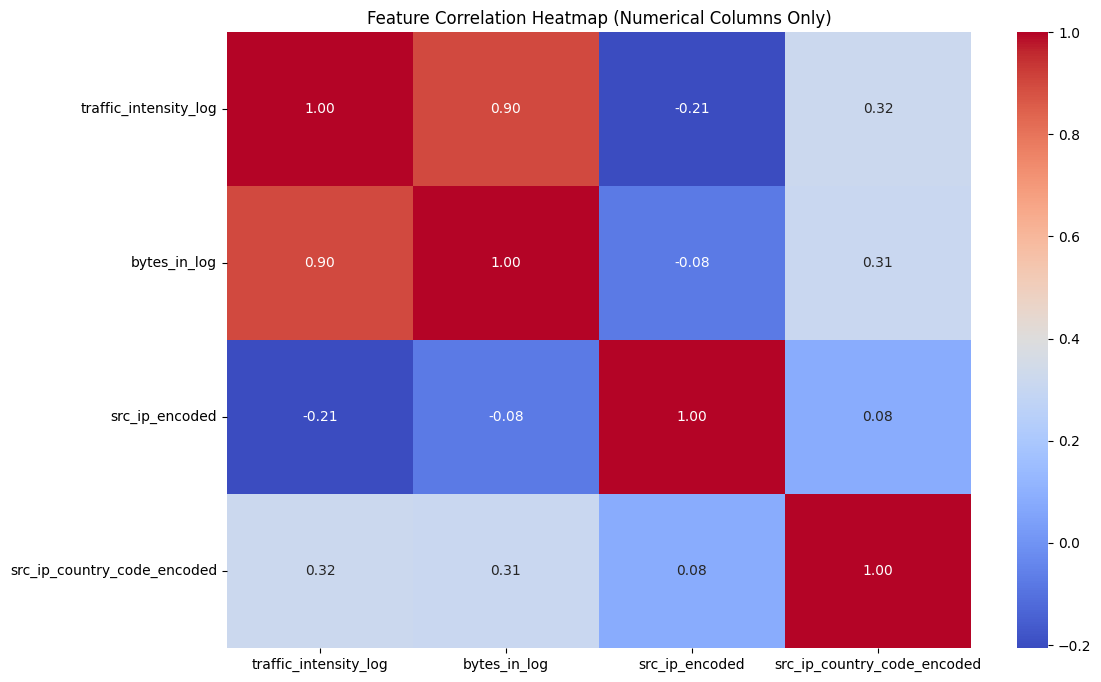

In [54]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numerical Columns Only)')
plt.show()


✔️ Unique Values in creation_time:
creation_time
2024-04-26 09:00:00+00:00    17
2024-04-26 08:50:00+00:00    13
2024-04-26 09:50:00+00:00    11
2024-04-25 23:20:00+00:00    11
2024-04-26 09:40:00+00:00    11
2024-04-25 23:10:00+00:00    11
2024-04-26 00:40:00+00:00    10
2024-04-26 08:20:00+00:00    10
2024-04-26 01:20:00+00:00    10
2024-04-26 01:00:00+00:00    10
2024-04-25 23:00:00+00:00    10
2024-04-26 01:30:00+00:00    10
2024-04-26 00:10:00+00:00    10
2024-04-25 23:50:00+00:00     9
2024-04-26 01:10:00+00:00     9
2024-04-26 01:40:00+00:00     9
2024-04-26 09:30:00+00:00     9
2024-04-25 23:40:00+00:00     9
2024-04-26 00:30:00+00:00     9
2024-04-26 09:10:00+00:00     9
2024-04-25 23:30:00+00:00     8
2024-04-26 09:20:00+00:00     8
2024-04-26 00:00:00+00:00     8
2024-04-26 08:30:00+00:00     8
2024-04-26 01:50:00+00:00     8
2024-04-26 00:20:00+00:00     8
2024-04-26 08:40:00+00:00     7
2024-04-26 08:10:00+00:00     7
2024-04-26 08:00:00+00:00     7
2024-04-26 00:50:00+00

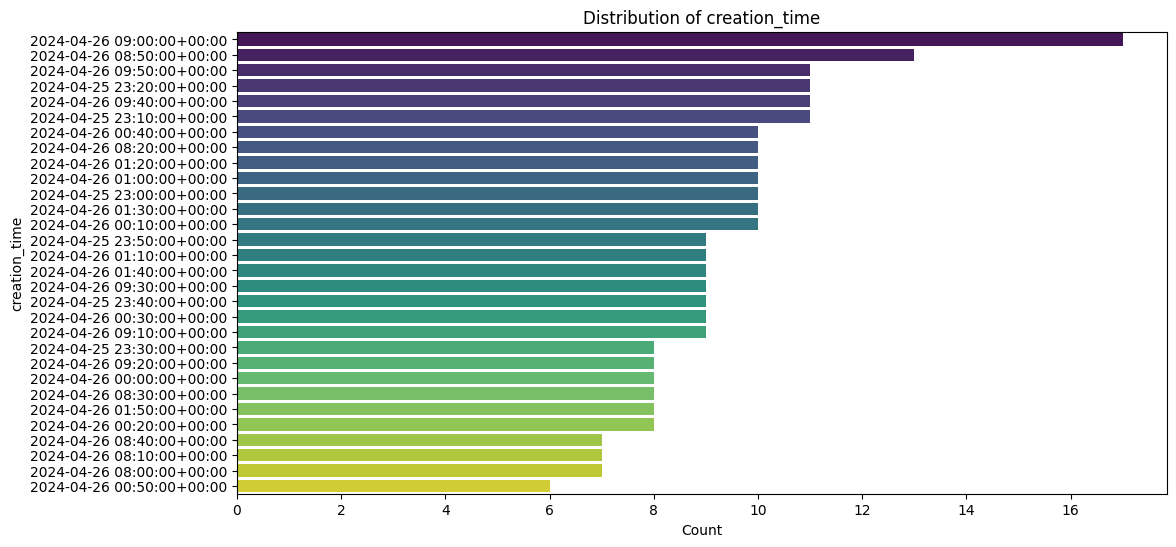


✔️ Unique Values in end_time:
end_time
2024-04-26 09:10:00+00:00    17
2024-04-26 09:00:00+00:00    13
2024-04-26 10:00:00+00:00    11
2024-04-25 23:30:00+00:00    11
2024-04-26 09:50:00+00:00    11
2024-04-25 23:20:00+00:00    11
2024-04-26 00:50:00+00:00    10
2024-04-26 08:30:00+00:00    10
2024-04-26 01:30:00+00:00    10
2024-04-26 01:10:00+00:00    10
2024-04-25 23:10:00+00:00    10
2024-04-26 01:40:00+00:00    10
2024-04-26 00:20:00+00:00    10
2024-04-26 00:00:00+00:00     9
2024-04-26 01:20:00+00:00     9
2024-04-26 01:50:00+00:00     9
2024-04-26 09:40:00+00:00     9
2024-04-25 23:50:00+00:00     9
2024-04-26 00:40:00+00:00     9
2024-04-26 09:20:00+00:00     9
2024-04-25 23:40:00+00:00     8
2024-04-26 09:30:00+00:00     8
2024-04-26 00:10:00+00:00     8
2024-04-26 08:40:00+00:00     8
2024-04-26 02:00:00+00:00     8
2024-04-26 00:30:00+00:00     8
2024-04-26 08:50:00+00:00     7
2024-04-26 08:20:00+00:00     7
2024-04-26 08:10:00+00:00     7
2024-04-26 01:00:00+00:00     6


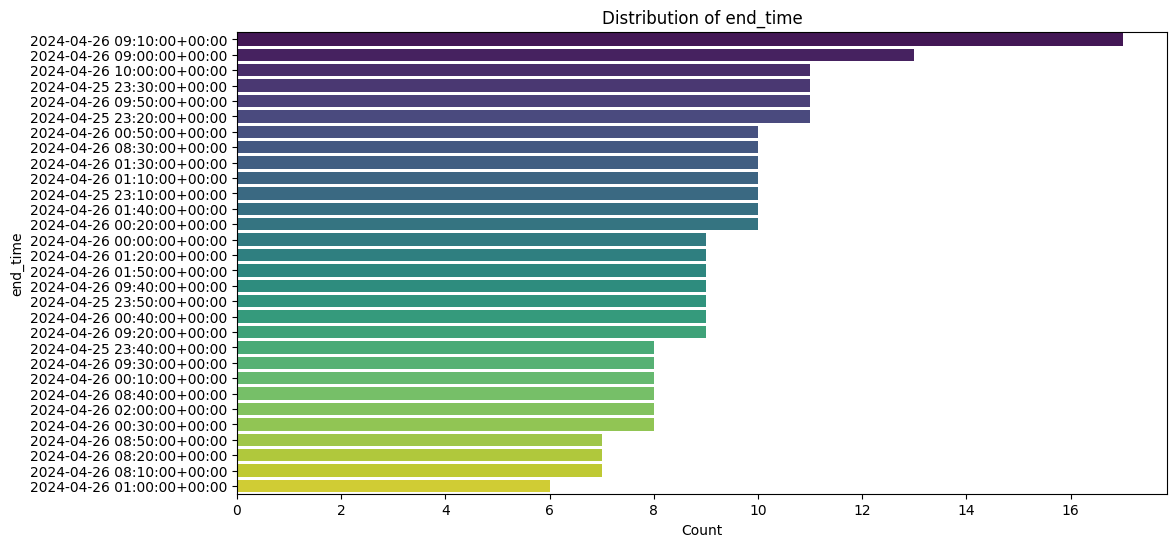


✔️ Unique Values in src_ip:
src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
136.226.64.114     13
165.225.33.6       12
136.226.80.97      11
165.225.213.7      11
165.225.8.79        6
192.241.230.19      2
65.49.1.69          2
198.235.24.81       1
65.49.1.72          1
65.49.1.94          1
65.49.1.104         1
65.49.1.97          1
65.49.1.99          1
65.49.1.76          1
65.49.1.96          1
65.49.1.95          1
65.49.1.74          1
192.241.205.18      1
Name: count, dtype: int64


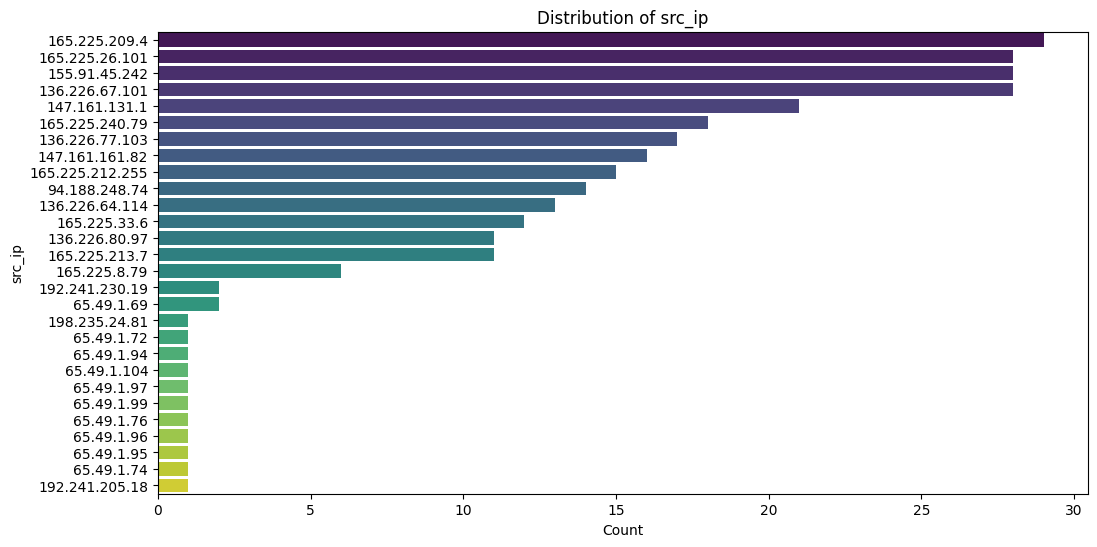


✔️ Unique Values in src_ip_country_code:
src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64


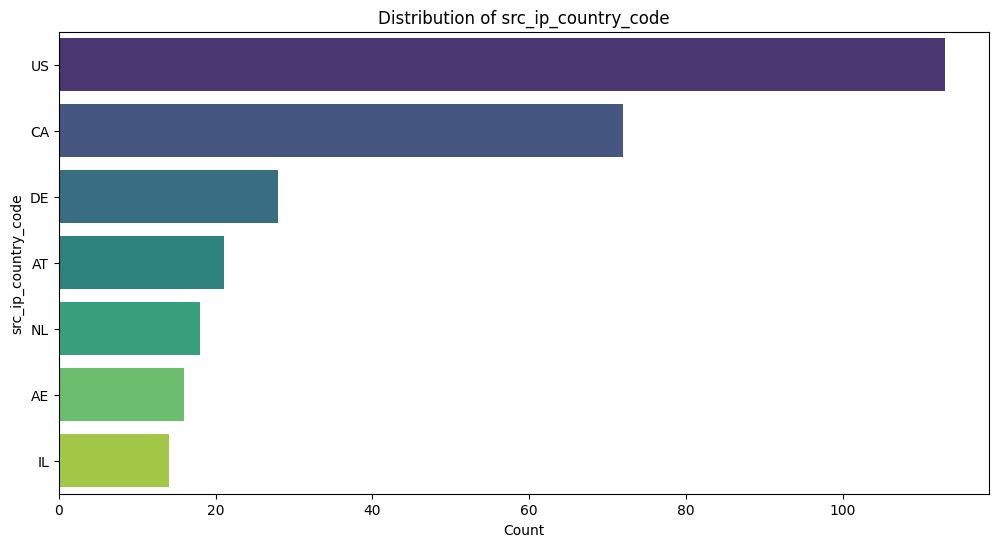


✔️ Unique Values in protocol:
protocol
HTTPS    282
Name: count, dtype: int64


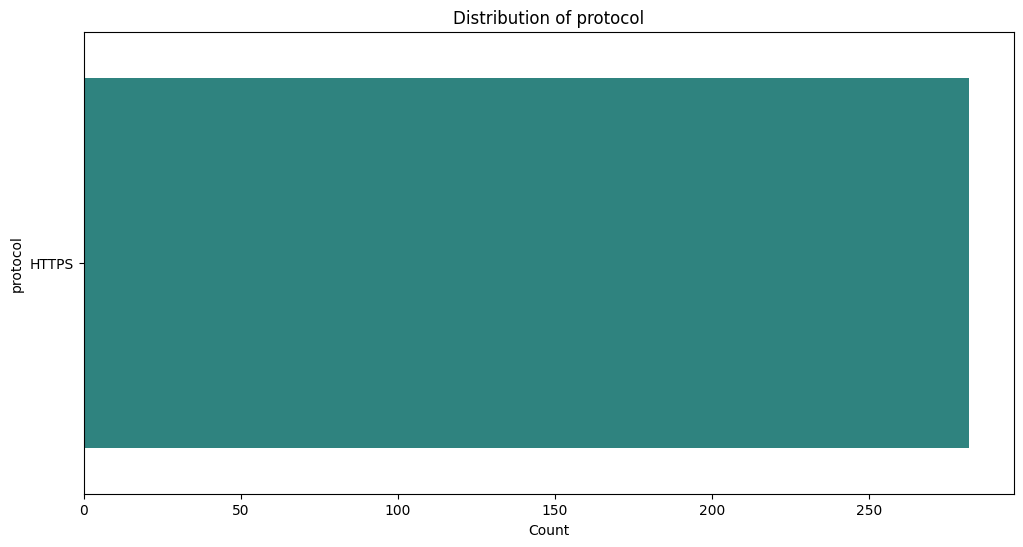


✔️ Unique Values in dst_ip:
dst_ip
10.138.69.97    282
Name: count, dtype: int64


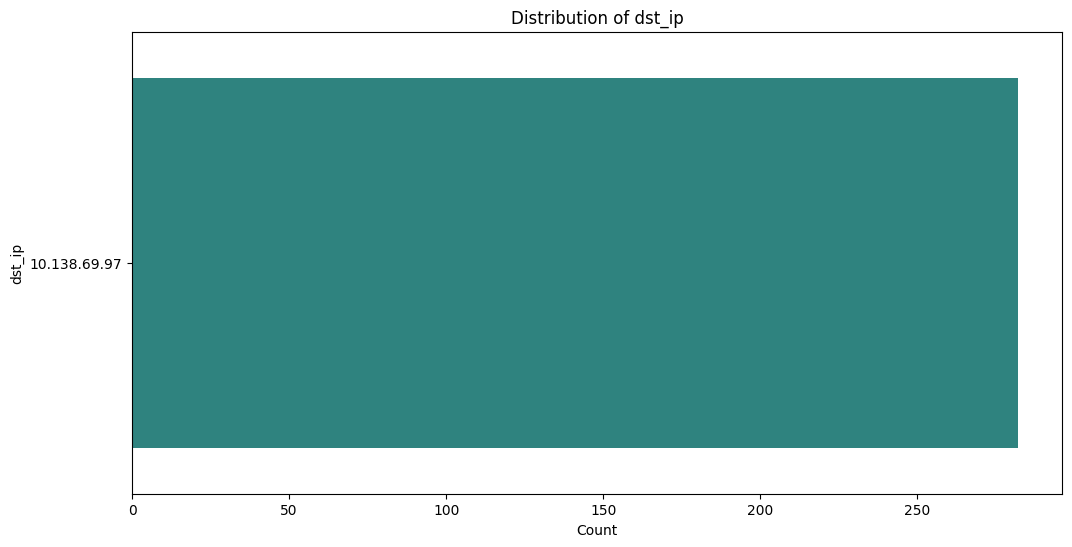


✔️ Unique Values in rule_names:
rule_names
Suspicious Web Traffic    282
Name: count, dtype: int64


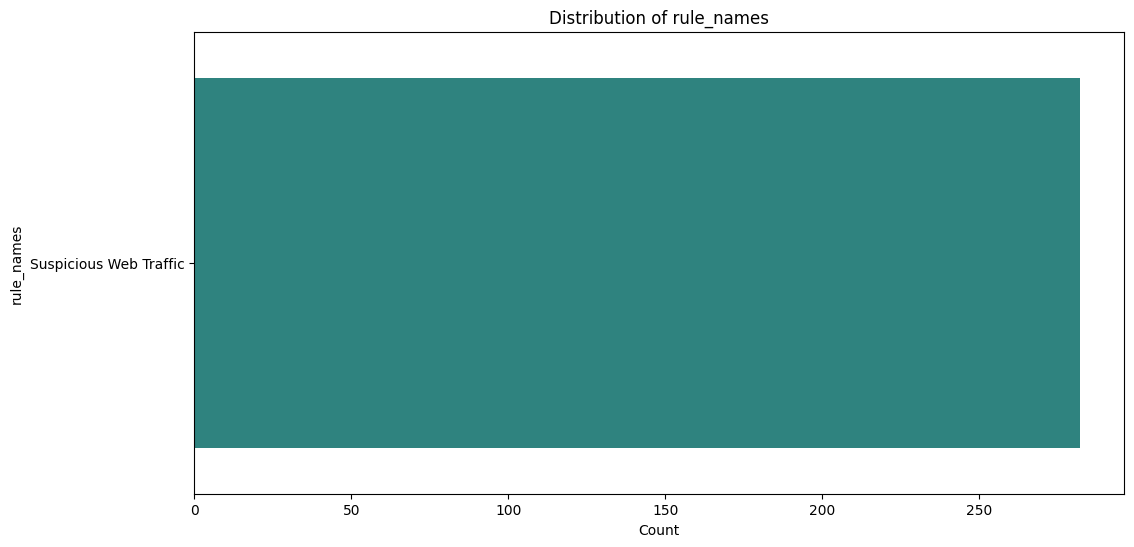


✔️ Unique Values in observation_name:
observation_name
Adversary Infrastructure Interaction    282
Name: count, dtype: int64


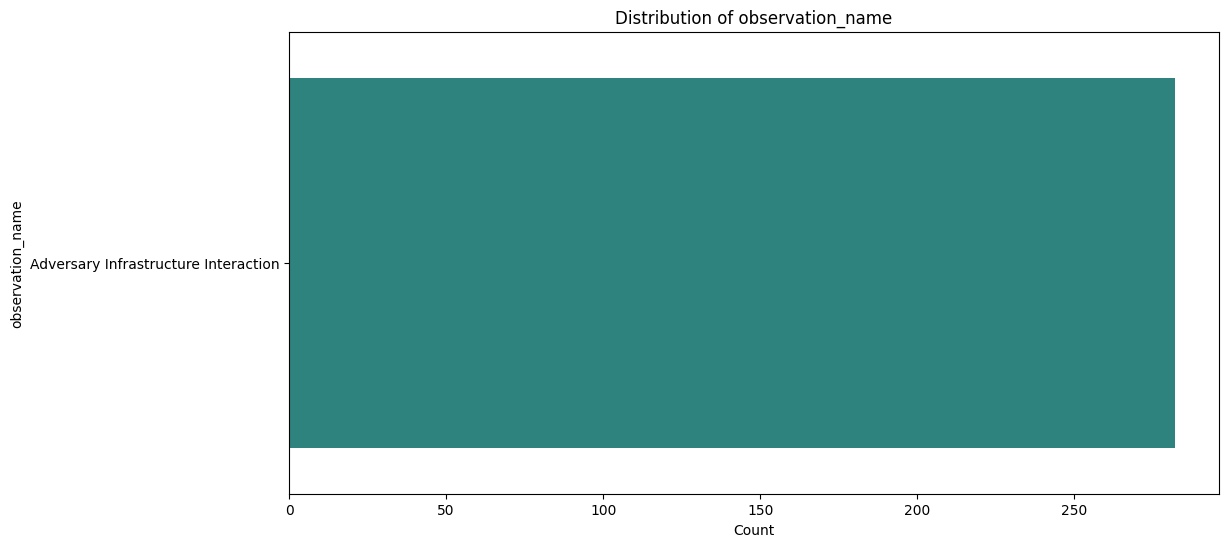


✔️ Unique Values in source.meta:
source.meta
AWS_VPC_Flow    282
Name: count, dtype: int64


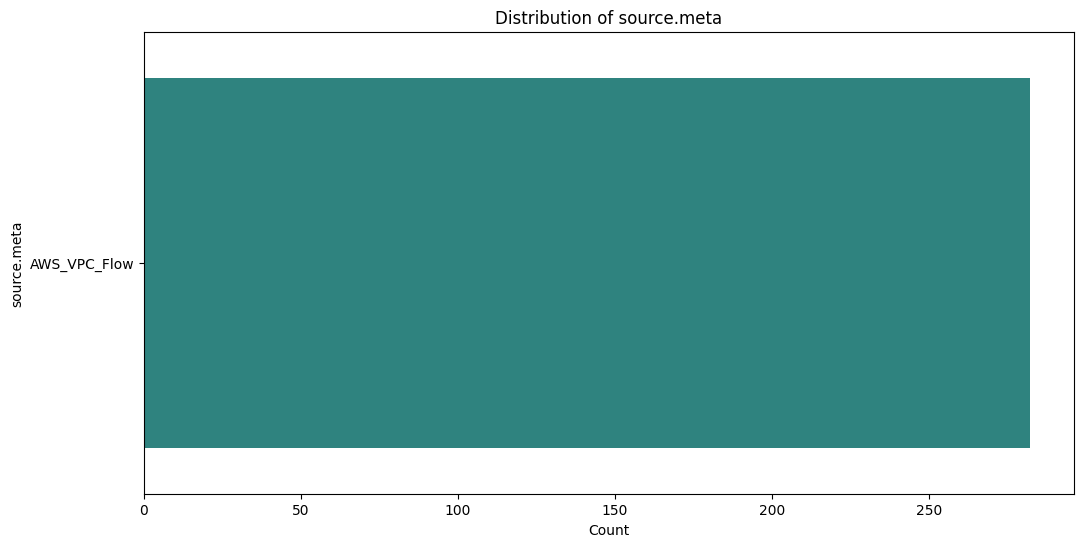


✔️ Unique Values in source.name:
source.name
prod_webserver    282
Name: count, dtype: int64


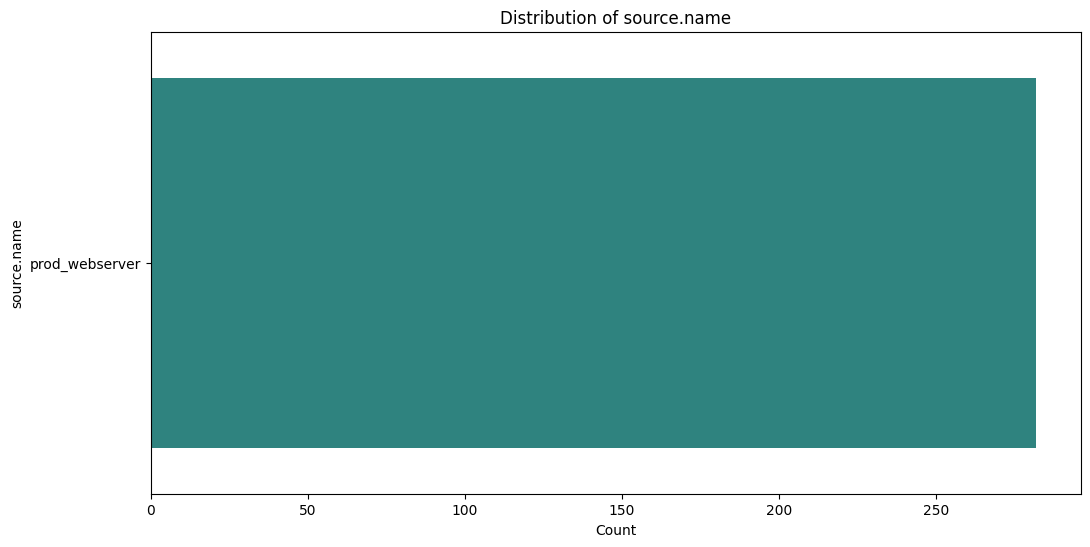


✔️ Unique Values in time:
time
2024-04-26 09:00:00+00:00    17
2024-04-26 08:50:00+00:00    13
2024-04-26 09:50:00+00:00    11
2024-04-25 23:20:00+00:00    11
2024-04-26 09:40:00+00:00    11
2024-04-25 23:10:00+00:00    11
2024-04-26 00:40:00+00:00    10
2024-04-26 08:20:00+00:00    10
2024-04-26 01:20:00+00:00    10
2024-04-26 01:00:00+00:00    10
2024-04-25 23:00:00+00:00    10
2024-04-26 01:30:00+00:00    10
2024-04-26 00:10:00+00:00    10
2024-04-25 23:50:00+00:00     9
2024-04-26 01:10:00+00:00     9
2024-04-26 01:40:00+00:00     9
2024-04-26 09:30:00+00:00     9
2024-04-25 23:40:00+00:00     9
2024-04-26 00:30:00+00:00     9
2024-04-26 09:10:00+00:00     9
2024-04-25 23:30:00+00:00     8
2024-04-26 09:20:00+00:00     8
2024-04-26 00:00:00+00:00     8
2024-04-26 08:30:00+00:00     8
2024-04-26 01:50:00+00:00     8
2024-04-26 00:20:00+00:00     8
2024-04-26 08:40:00+00:00     7
2024-04-26 08:10:00+00:00     7
2024-04-26 08:00:00+00:00     7
2024-04-26 00:50:00+00:00     6
Name: co

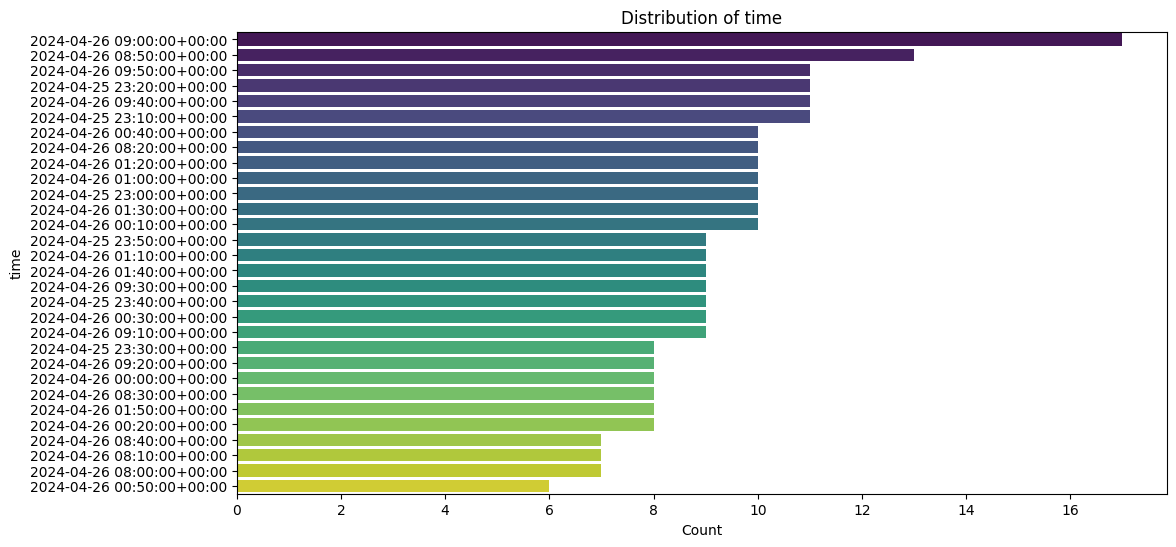


✔️ Unique Values in detection_types:
detection_types
waf_rule    282
Name: count, dtype: int64


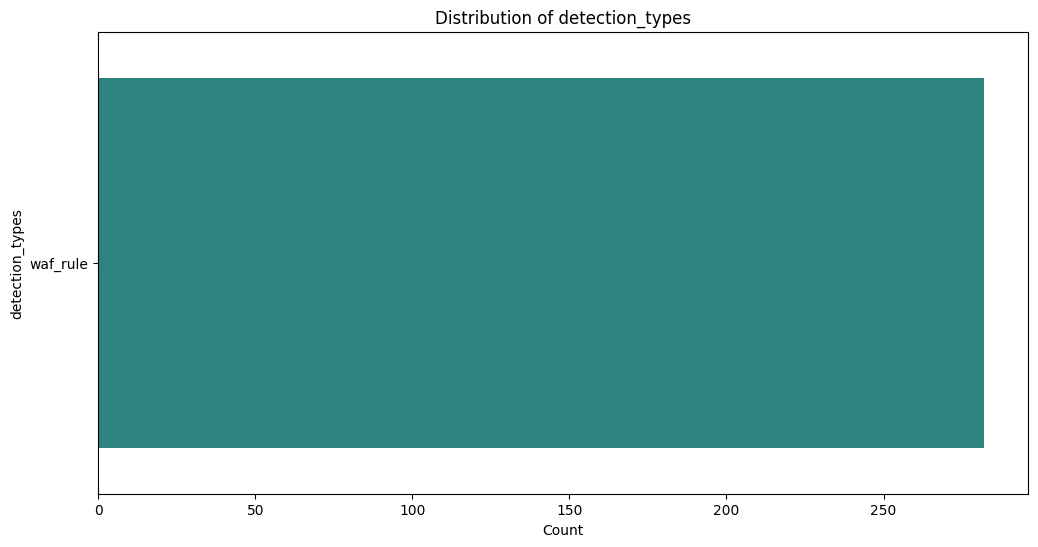

In [55]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n✔️ Unique Values in {col}:")
    print(data[col].value_counts())

    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()